# connect to db

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname = db)

# Q1

In [4]:
sql = " select * from student "

In [6]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_11597/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# Q2

In [8]:
sql = """
select professor.p_name, course.c_name
from professor
inner join course
on professor.p_email = course.p_email

"""


In [9]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_11597/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# Q3

In [12]:
sql = """
select c_number,COUNT(*) as num_student
from enroll
group by c_number 
order by num_student asc

"""

/tmp/ipykernel_11597/4129695694.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

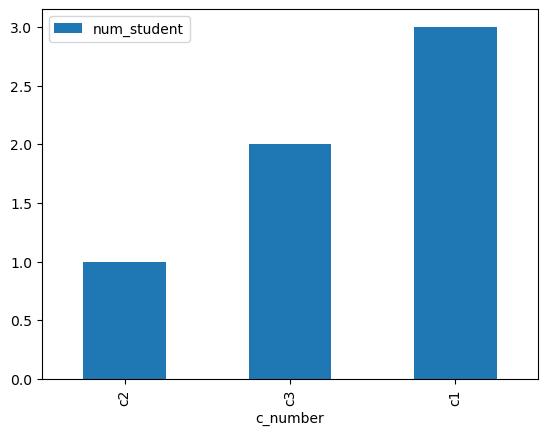

In [13]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number', y='num_student')

# Q4

In [18]:
sql = """
select professor.p_name, COUNT(course.c_number) as num_course_taught
from professor
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_course_taught desc

"""

/tmp/ipykernel_11597/692320839.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

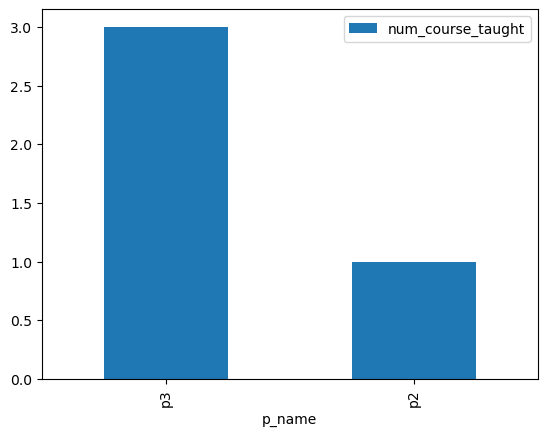

In [19]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name', y='num_course_taught')

# Q5

In [35]:
cur = conn.cursor()


In [51]:
sql = """insert into professor(p_email,p_name,office)
values('p4@jmu.edu','p4','o4')"""

In [52]:
cur.execute(sql)

In [50]:
conn.rollback()

In [54]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

/tmp/ipykernel_11597/385041841.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor', conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [55]:
cur = conn.cursor()

In [56]:
sql = """insert into course(c_number,c_name,room,p_email)
values('c5','linkedin','r2','p4@jmu.edu')

"""

In [57]:
cur.execute(sql)

In [58]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

/tmp/ipykernel_11597/4028193866.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course', conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
